In [131]:
# import libraries
import pandas as pd
import numpy as np
import string
import re
import matplotlib.pyplot as plt
from collections import Counter
import os

In [132]:
# Path modified to locate file on local server
# Step 1:  Load data into a dataframe
addr1 = "/Users/saraherbstreit/Documents/week-5/articles1.csv"
articles = pd.read_csv(addr1)

In [133]:
# Check number of rows and columns
# Step 2:  check the dimension of the table/look at the data
print("The dimension of the table is: ", articles.shape)

# swapped print function for display for easier reading
# removed 5 bc redundant, head function returns 5 rows by default
display(articles.head())

The dimension of the table is:  (50000, 10)


,Unnamed: 0,id,title,publication,author,date,year,month,url,content
0,0,17283,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,2016-12-31,2016.0,12.0,nan,WASHINGTON — Congressional Republicans have...
1,1,17284,Rift Between Officers and Residents as Killing...,New York Times,Benjamin Mueller and Al Baker,2017-06-19,2017.0,6.0,nan,"After the bullet shells get counted, the blood..."
2,2,17285,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...",New York Times,Margalit Fox,2017-01-06,2017.0,1.0,nan,"When Walt Disney’s “Bambi” opened in 1942, cri..."
3,3,17286,"Among Deaths in 2016, a Heavy Toll in Pop Musi...",New York Times,William McDonald,2017-04-10,2017.0,4.0,nan,"Death may be the great equalizer, but it isn’t..."
4,4,17287,Kim Jong-un Says North Korea Is Preparing to T...,New York Times,Choe Sang-Hun,2017-01-02,2017.0,1.0,nan,"SEOUL, South Korea — North Korea’s leader, ..."


In [134]:
# Added decimal formatting bc values had too many
pd.options.display.float_format = "{:.1f}".format

#what type of variables are in the table
# adjusted formatting on printed text
print("Describe Data: \n")

# swapped print function for display for easier reading
display(articles.describe())
print("\n Summarized Data: \n")
display(articles.describe(include=['O']))

Describe Data: 



,Unnamed: 0,id,year,month,url
count,50000.0,50000.0,50000.0,50000.0,0.0
mean,25694.4,44432.5,2016.3,5.5,nan
std,15350.1,15773.6,0.6,3.3,nan
min,0.0,17283.0,2011.0,1.0,nan
25%,12500.8,31236.8,2016.0,3.0,nan
50%,25004.5,43757.5,2016.0,5.0,nan
75%,38630.2,57479.2,2017.0,8.0,nan
max,53291.0,73469.0,2017.0,12.0,nan



 Summarized Data: 



,title,publication,author,date,content
count,50000,50000,43694,50000,50000
unique,49920,5,3603,983,49888
top,The 10 most important things in the world righ...,Breitbart,Breitbart News,2016-08-22,advertisement
freq,7,23781,1559,221,42


In [135]:
# Added context
# display length of data
print("The length of the data is",len(articles), "rows")

The length of the data is 50000 rows


In [136]:
#display publishers (publications)
print(articles.publication.unique())

['New York Times' 'Breitbart' 'CNN' 'Business Insider' 'Atlantic']


In [137]:
# added context
# remove decimal from years
articles.year = articles.year.apply(int)

#display min, max of years published
print("The earliest published article in this dataframe is",
      articles['year'].min())
print("The most recently published article in this dataframe is",
      articles['year'].max())

The earliest published article in this dataframe is 2011
The most recently published article in this dataframe is 2017


In [138]:
# added context
# adjusted formatting
#display how many articles from each year
print("The number of articles each year are: \n",
      articles['year'].value_counts(),sep='\n')

The number of articles each year are: 

2016    28451
2017    17908
2015     3326
2013      212
2014       76
2012       26
2011        1
Name: year, dtype: int64


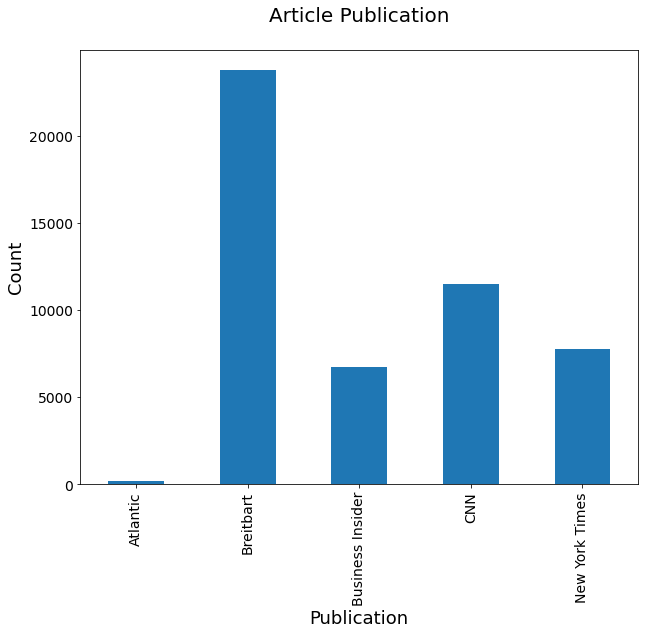

In [139]:
# broke up line for readability
# reduced graph size to fit screen
#Step 3:  Create some bar charts to show articles
# display bar chart of articles sorted by Publication Name
ax = (articles['publication'].value_counts().sort_index()
      .plot(kind='bar', fontsize=14, figsize=(10,8)))

ax.set_title('Article Publication\n', fontsize=20)
ax.set_xlabel('Publication', fontsize=18)
ax.set_ylabel('Count', fontsize=18);
plt.show()

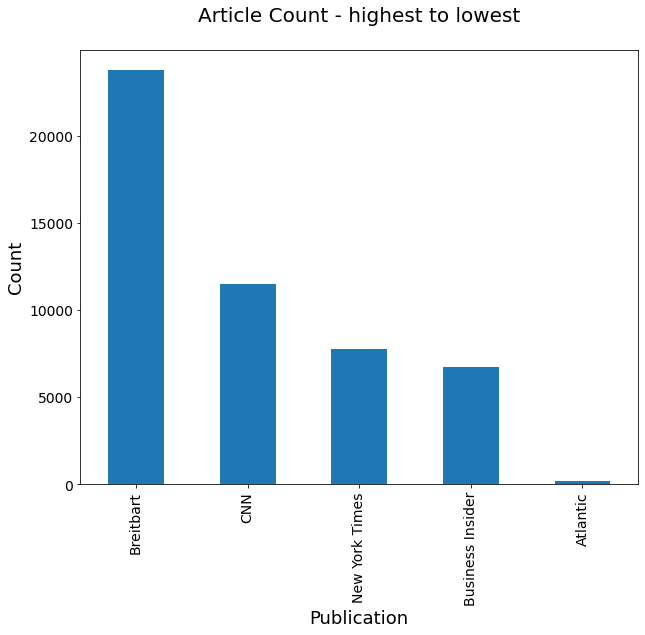

In [140]:
# adjusted verbage, reduced graph size to fit screen
#display bar chart of articles sorted by counts
ax = articles['publication'].value_counts().plot(kind='bar',
                                                 fontsize=14, figsize=(10,8))
ax.set_title('Article Count - highest to lowest\n', fontsize=20)
ax.set_xlabel('Publication', fontsize=18)
ax.set_ylabel('Count', fontsize=18);
plt.show()

In [141]:
#Step 4:  clean text:  no punctuation/all lowercase
def clean_text(article):
    clean1 = re.sub(r'['+string.punctuation + '’—”'+']', "", article.lower())
    return re.sub(r'\W+', ' ', clean1)

In [142]:
# These strings are not tokenized, they are cleaned.
articles['tokenized'] = articles['content'].map(lambda x: clean_text(x))
print("clean text: \n",articles['tokenized'].head(),sep='\n')

clean text: 

0    washington congressional republicans have a ne...
1    after the bullet shells get counted the blood ...
2    when walt disneys bambi opened in 1942 critics...
3    death may be the great equalizer but it isnt n...
4    seoul south korea north koreas leader kim said...
Name: tokenized, dtype: object


In [143]:
#look at mean, min, max article lengths
articles['num_wds'] = articles['tokenized'].apply(lambda x: len(x.split()))

# remove decimals
mean_wds = articles['num_wds'].mean()
print("Mean number words:", int(mean_wds))
print("Min number words:",articles['num_wds'].min())
print("Max number words:",articles['num_wds'].max())

Mean number words: 636
Min number words: 0
Max number words: 24736


In [144]:
# add context
# Count number of articles in df with no words
print("There are",len(articles[articles['num_wds']==0]), 
                     "articles with no words")

There are 65 articles with no words


In [158]:
# keep only articles with words
print("After removing articles with no words:")
articles = articles[articles['num_wds']>0]
mean_wds = articles['num_wds'].mean()
print("the new mean is:", int(mean_wds))
print("the new min is:",articles['num_wds'].min())

After removing articles with no words:
the new mean is: 637
the new min is: 1


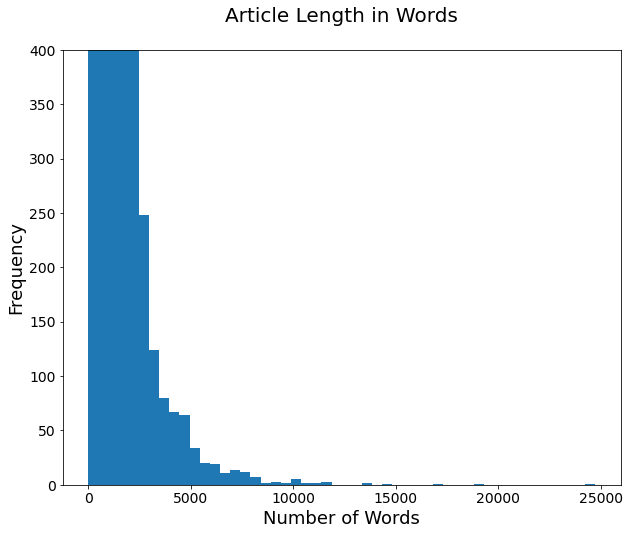

In [156]:
#Step 6:  Check for Outliers:  show bar graph of outliers
ax=articles['num_wds'].plot(kind='hist', bins=50, fontsize=14, figsize=(10,8))
ax.set_title('Article Length in Words\n', fontsize=20)
ax.set_ylabel('Frequency', fontsize=18)

# reduced y axis scale to visualize outliers
plt.ylim(0, 400)
ax.set_xlabel('Number of Words', fontsize=18);
plt.show()